In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
import numpy as np
import math
from scipy import stats
sns.set()

In [2]:
parasweep = pd.read_csv("fox_rabbit3D_multipara.csv")

In [3]:
parasweep.shape

(432000, 8)

In [4]:
parasweep.head()

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
0,0.544513,1157.0,1152.0,5.0,0.005,5.000000,1,20
1,0.391062,1139.0,563.0,5.0,0.005,6.666667,1,20
2,0.371088,3011.0,253.0,5.0,0.005,8.333333,1,20
3,0.198700,580.0,80.0,5.0,0.005,10.000000,1,20
4,0.437672,757.0,717.0,5.0,0.005,11.666667,1,20


<AxesSubplot: xlabel='The number of rabbits', ylabel='runtime'>

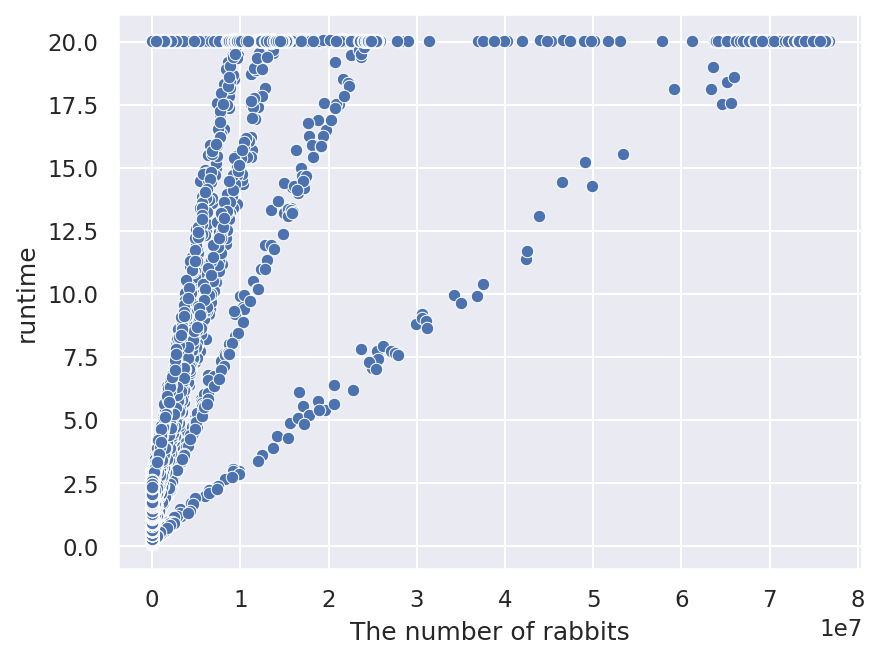

In [5]:
sns.scatterplot(x=parasweep["The number of rabbits"], y = parasweep["runtime"])

In [5]:
paraover20 = parasweep[parasweep["runtime"]>=20]
paraover20 = paraover20[paraover20["The number of rabbits"]>2.5e7]
paraover20

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
432,20.040662,4.517268e+07,0.0,11.666667,0.010000,8.333333,1,20
3160,20.037913,4.019907e+07,0.0,5.000000,0.011316,5.000000,1,20
3308,20.054169,4.432891e+07,0.0,5.000000,0.016842,11.315789,1,20
3679,20.040956,4.661130e+07,0.0,5.789474,0.015263,20.000000,1,20
4100,20.043227,4.189748e+07,0.0,6.578947,0.016842,5.000000,1,20
...,...,...,...,...,...,...,...,...
215807,20.016375,2.521725e+07,0.0,100.000000,0.064474,52.631579,3,30
215825,20.013981,2.552999e+07,0.0,100.000000,0.068421,44.736842,3,30
215878,20.017745,2.536935e+07,0.0,100.000000,0.076316,96.052632,3,30
215890,20.019799,2.522036e+07,0.0,100.000000,0.080263,64.473684,3,30


In [6]:
para20=pd.concat([parasweep,paraover20], ignore_index=False) 
para20.drop_duplicates(keep=False,inplace=True)
para20

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
0,0.544513,1.157000e+03,1152.000000,5.0,0.005,5.000000,1,20
1,0.391062,1.139000e+03,563.000000,5.0,0.005,6.666667,1,20
2,0.371088,3.011000e+03,253.000000,5.0,0.005,8.333333,1,20
3,0.198700,5.800000e+02,80.000000,5.0,0.005,10.000000,1,20
4,0.437672,7.570000e+02,717.000000,5.0,0.005,11.666667,1,20
...,...,...,...,...,...,...,...,...
431995,2.411189,1.102857e+03,893.142857,100.0,0.100,84.210526,7,40
431996,2.469272,3.614286e+02,1532.571429,100.0,0.100,88.157895,7,40
431997,2.330160,6.644286e+02,805.428571,100.0,0.100,92.105263,7,40
431998,20.024446,1.067954e+07,53.285714,100.0,0.100,96.052632,7,40


<AxesSubplot: xlabel='r_birth', ylabel='f_birth'>

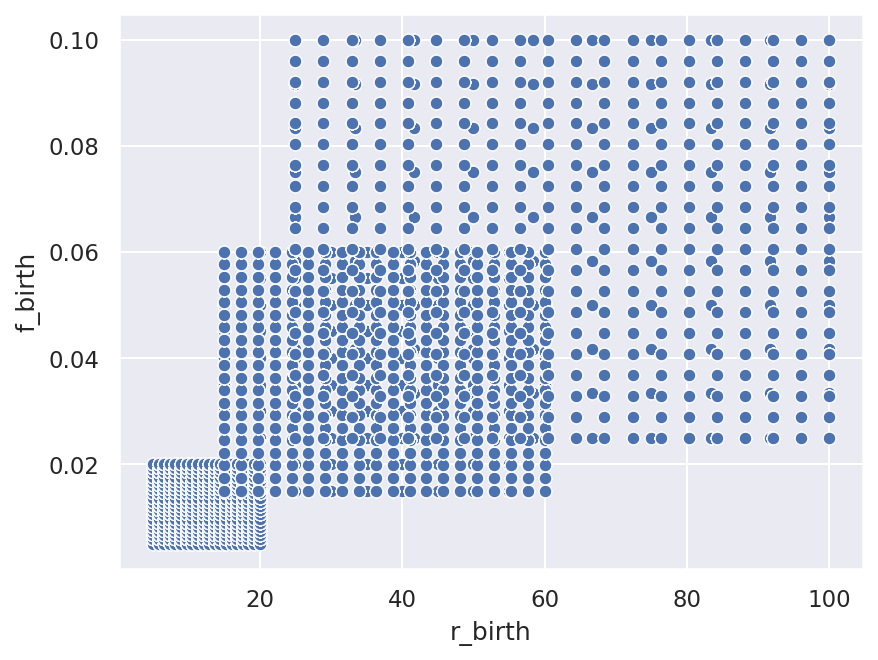

In [7]:
fig, ax = plt.subplots(1,1)
sns.scatterplot(x = para20["r_birth"], y = para20["f_birth"], ax = ax)
#fig.savefig("parameters.png")

<AxesSubplot: xlabel='f_birth', ylabel='f_death'>

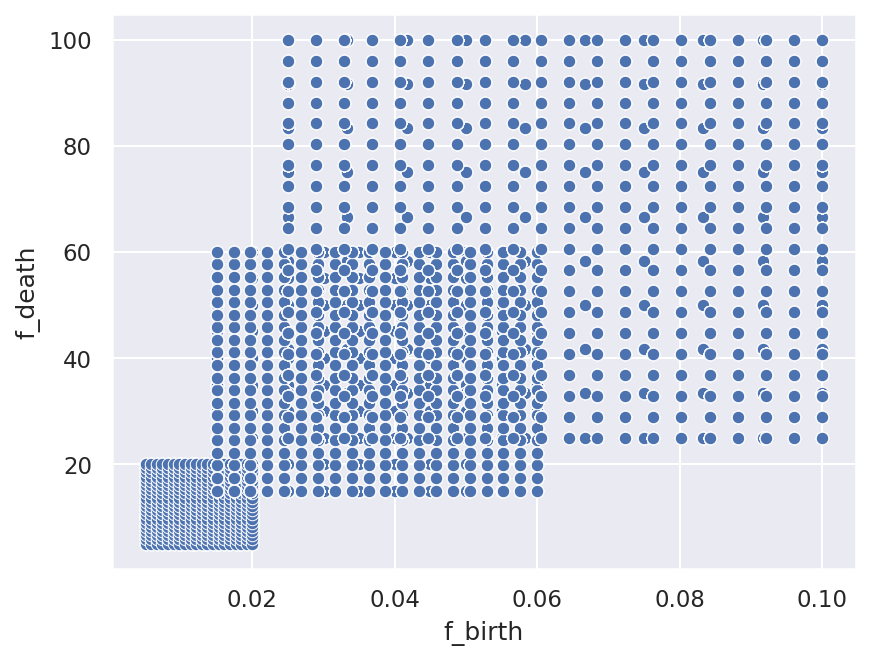

In [8]:
sns.scatterplot(x = para20["f_birth"], y = para20["f_death"])

<AxesSubplot: xlabel='r_birth', ylabel='f_death'>

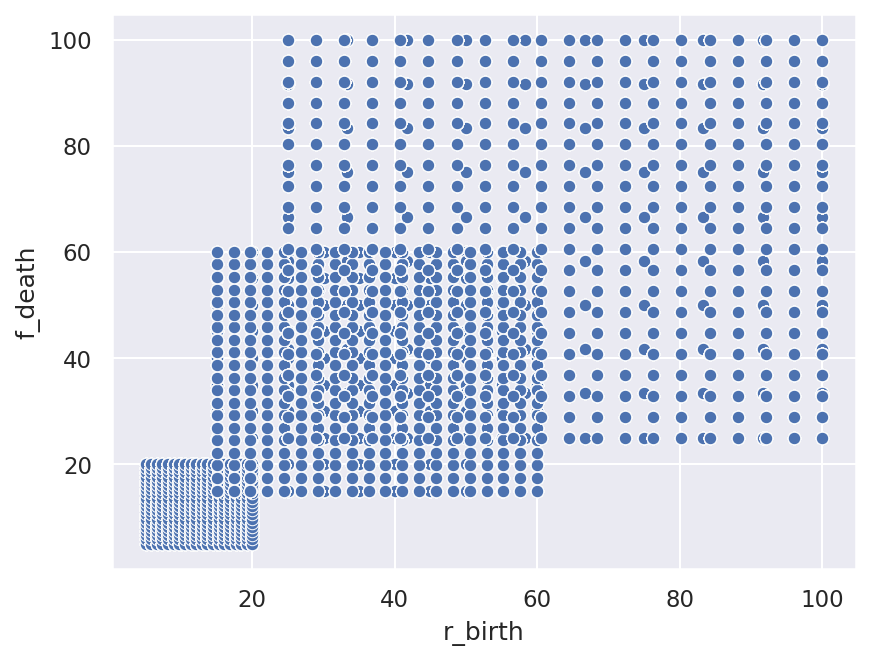

In [9]:
sns.scatterplot(x = para20["r_birth"], y = para20["f_death"])

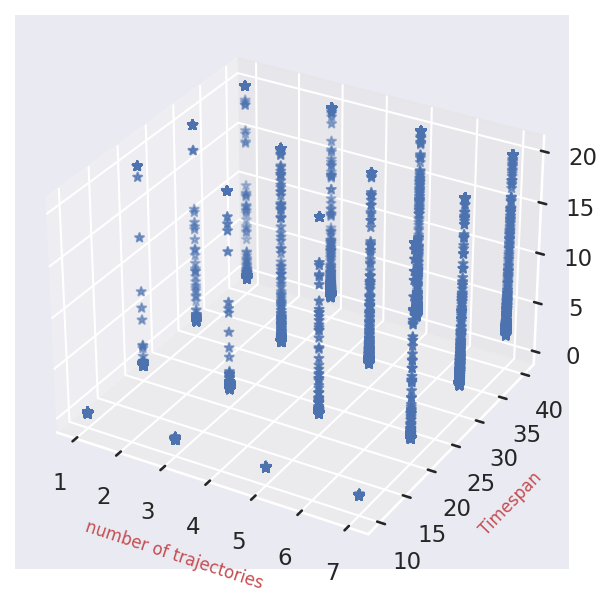

In [10]:
#fig = plt.figure(figsize = (8,6))
#fig,ax = plt.subplots(1,1)
#ax3d = Axes3D(fig)
ax3d = plt.figure().add_subplot(111, projection = '3d')
ax3d.scatter(xs=para20["number_of_trajectories"], ys=para20["Timespan"], zs=para20["runtime"],c="b",marker="*")
ax3d.set_xlabel("number of trajectories", color = "r",fontsize = 8)
ax3d.set_ylabel("Timespan",color = "r",fontsize = 8)
ax3d.set_zlabel("runtime",color = "r",fontsize = 8)
#plt.savefig("3D.png")
plt.show()

In [11]:
group_tspan = para20.groupby(["Timespan"]).agg({"runtime":"mean"})
group_tspan["Timespan"] = group_tspan.index
group_tspan

,runtime,Timespan
Timespan,,
10,0.382542,10
20,0.920440,20
30,2.528338,30
40,5.506183,40


<AxesSubplot: xlabel='Timespan', ylabel='runtime'>

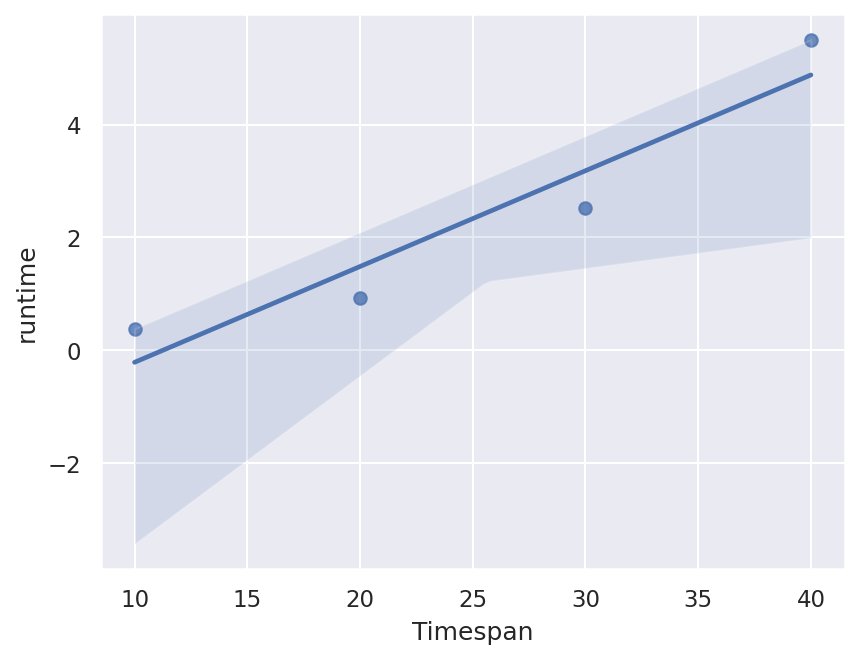

In [12]:
sns.regplot(data = group_tspan,x = "Timespan",y = "runtime")
#plt.savefig("ts.png")

In [13]:
group_num = para20.groupby(["number_of_trajectories"]).agg({"runtime":"mean"})
group_num["number_of_trajectories"] = group_num.index
group_num

,runtime,number_of_trajectories
number_of_trajectories,,
1,0.308146,1
3,1.881948,3
5,3.025801,5
7,4.023614,7


<AxesSubplot: xlabel='number_of_trajectories', ylabel='runtime'>

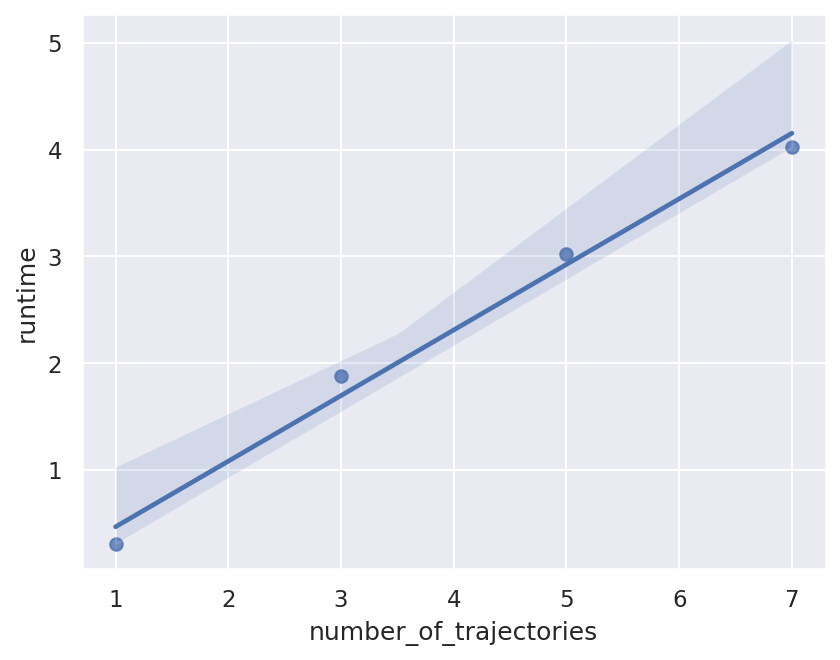

In [14]:
sns.regplot(data = group_num,x = "number_of_trajectories",y = "runtime")
#plt.savefig("numtra.png")

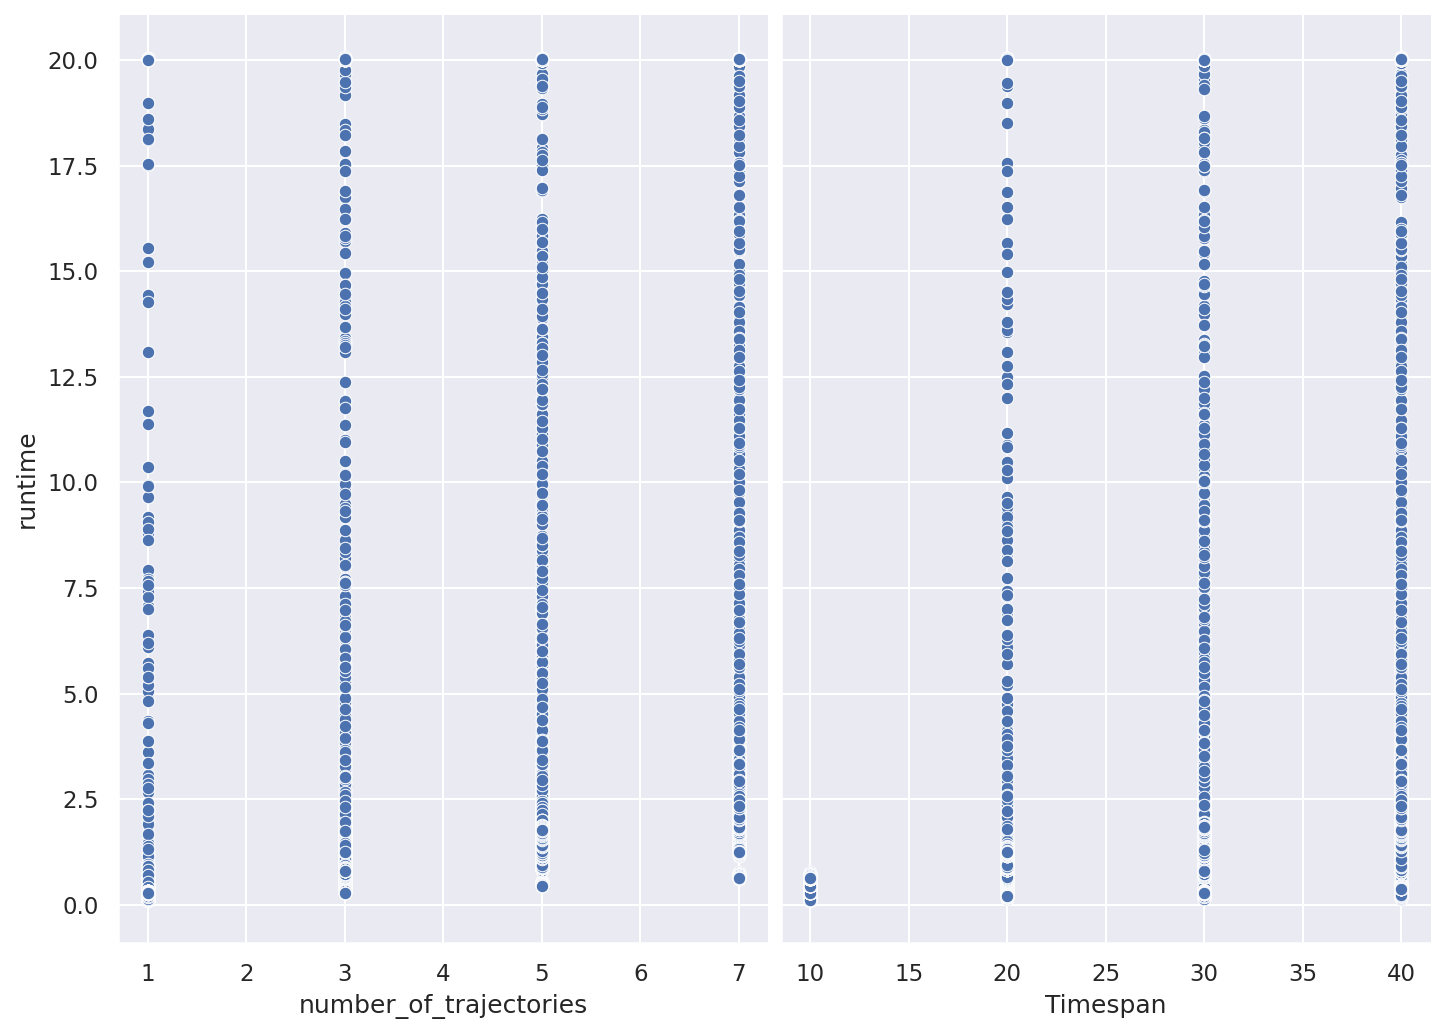

In [15]:
sns.pairplot(para20, x_vars=["number_of_trajectories", "Timespan"], y_vars = "runtime", height = 7,aspect = 0.7)

timespan = 10
                         runtime
number_of_trajectories          
1                       0.131177
3                       0.301932
5                       0.459227
7                       0.637831
runtime = 0.05+0.08 n_tra
timespan = 20
                         runtime
number_of_trajectories          
1                       0.272197
3                       0.746034
5                       1.109042
7                       1.553598
runtime = 0.08+0.21 n_tra
timespan = 30
                         runtime
number_of_trajectories          
1                       0.353658
3                       1.841398
5                       3.326920
7                       4.540860
runtime = -0.29+0.7 n_tra
timespan = 40
                         runtime
number_of_trajectories          
1                       0.487628
3                       4.648994
5                       7.208017
7                       9.362168
runtime = -0.38+1.45 n_tra


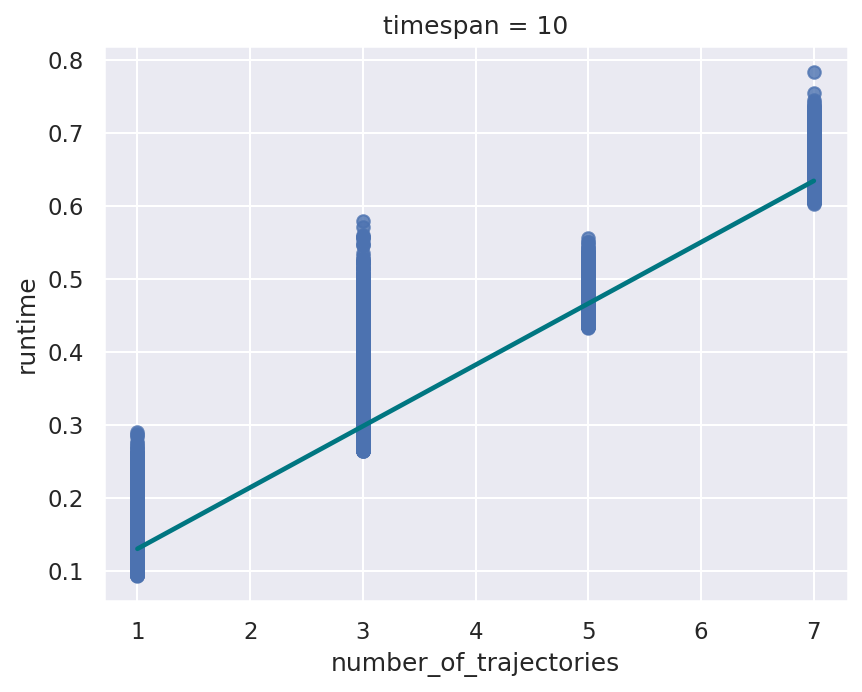

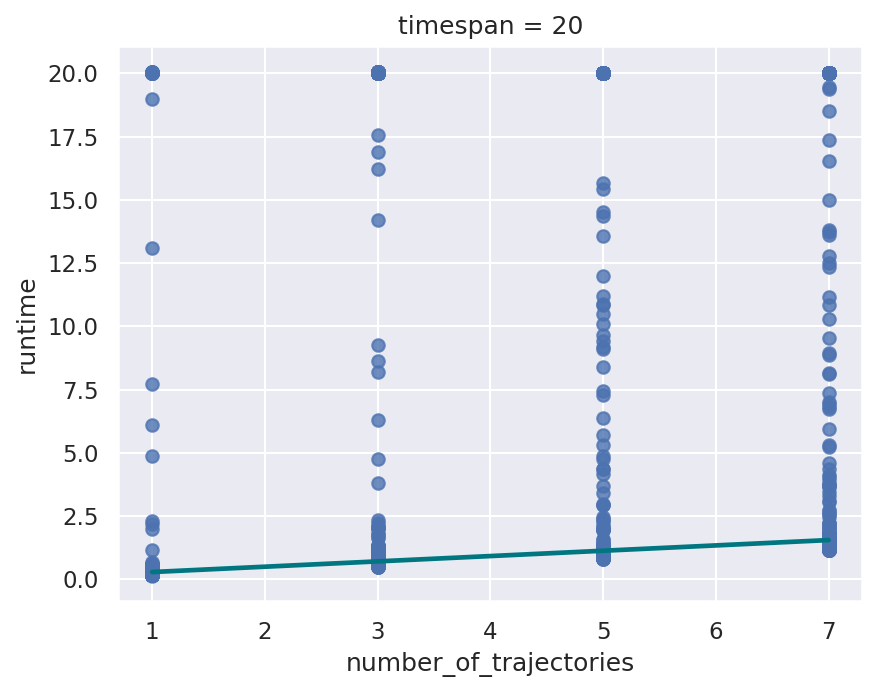

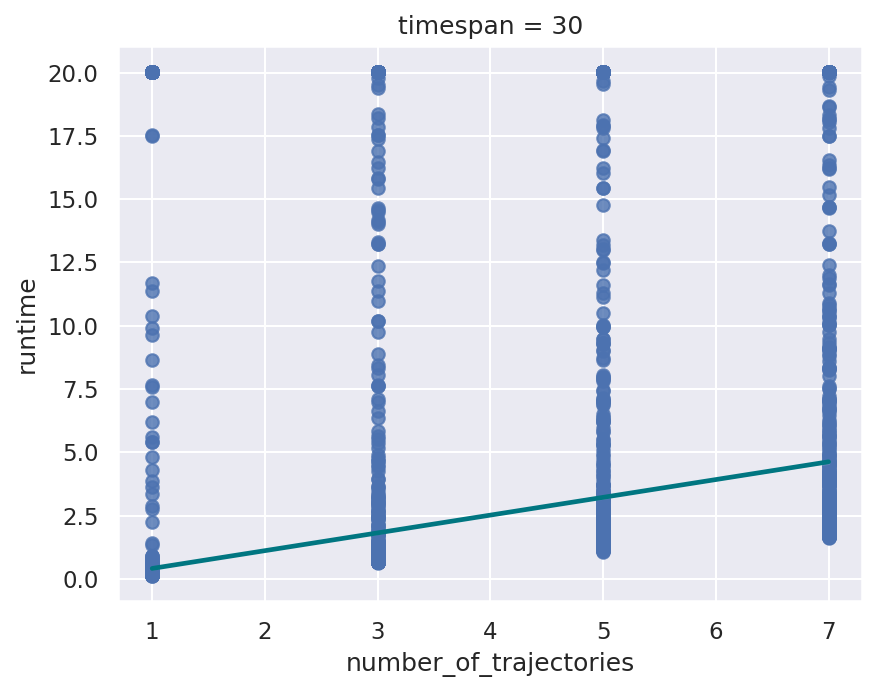

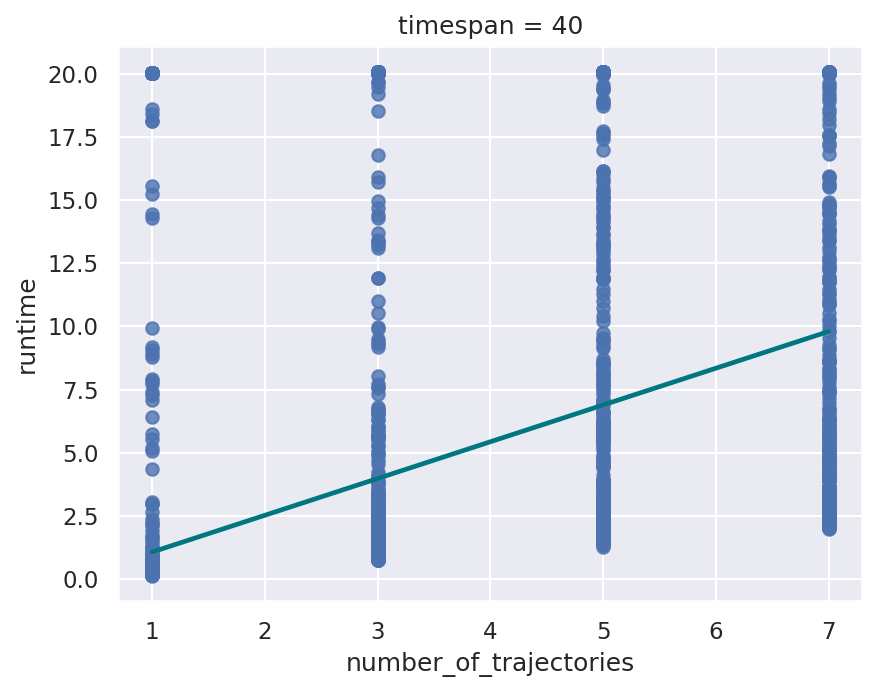

In [16]:
# for specific Timespan
for i in range(10,41,10):
    o = 1
    para_timesp = para20[para20["Timespan"] == i]
    print(f"timespan = {i}")
    print(para_timesp.groupby(["number_of_trajectories"]).agg({"runtime":"mean"}))
    slope, intercept, r_value, p_value, std_err = stats.linregress(para_timesp["number_of_trajectories"], para_timesp["runtime"])
    if slope > 0:
        lab = f"runtime = {round(intercept, 2)}+{round(slope, 2)} n_tra"
    else:
        lab = f"runtime = {round(intercept, 2)}-{round(abs(slope), 2)} n_tra"
            
    print(lab)        
    fig,ax = plt.subplots(1,1)
    sns.regplot(x = para_timesp["number_of_trajectories"], y = para_timesp["runtime"], ax=ax, line_kws={"color": "#007681", "label": lab})
    plt.title(f"timespan = {i}")

number_of_trajectories = 1
           runtime
Timespan          
10        0.131177
20        0.272197
30        0.353658
40        0.487628
runtime = 0.02+0.01 Timespan
number_of_trajectories = 3
           runtime
Timespan          
10        0.301932
20        0.746034
30        1.841398
40        4.648994
runtime = -1.65+0.14 Timespan
number_of_trajectories = 5
           runtime
Timespan          
10        0.459227
20        1.109042
30        3.326920
40        7.208017
runtime = -2.59+0.22 Timespan
number_of_trajectories = 7
           runtime
Timespan          
10        0.637831
20        1.553598
30        4.540860
40        9.362168
runtime = -3.27+0.29 Timespan


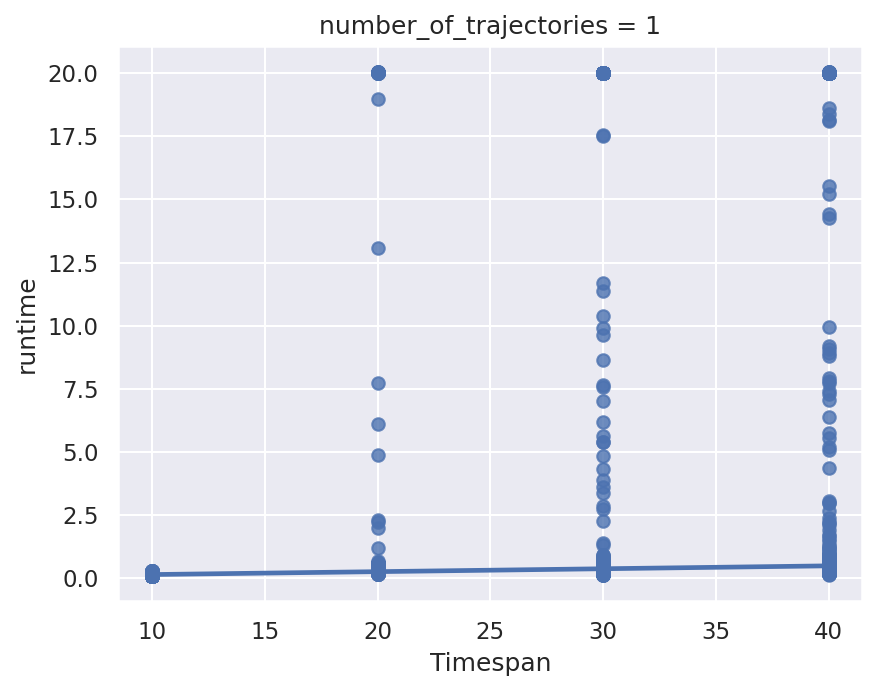

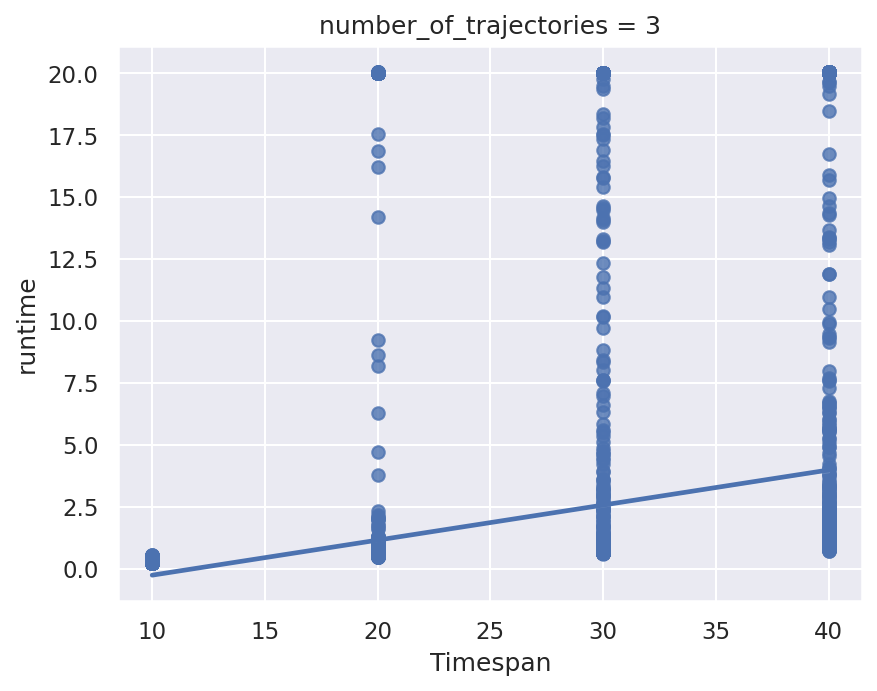

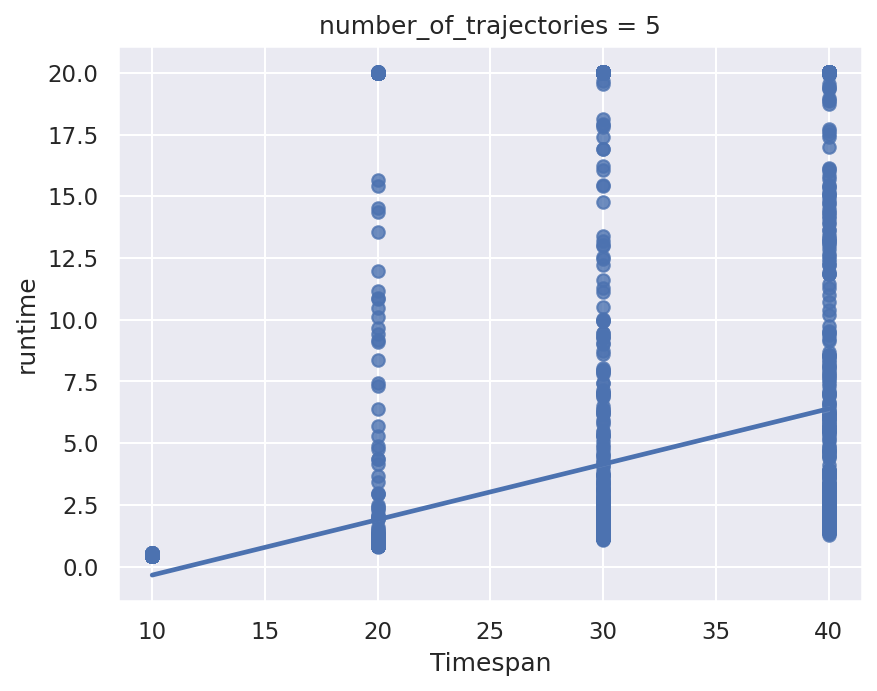

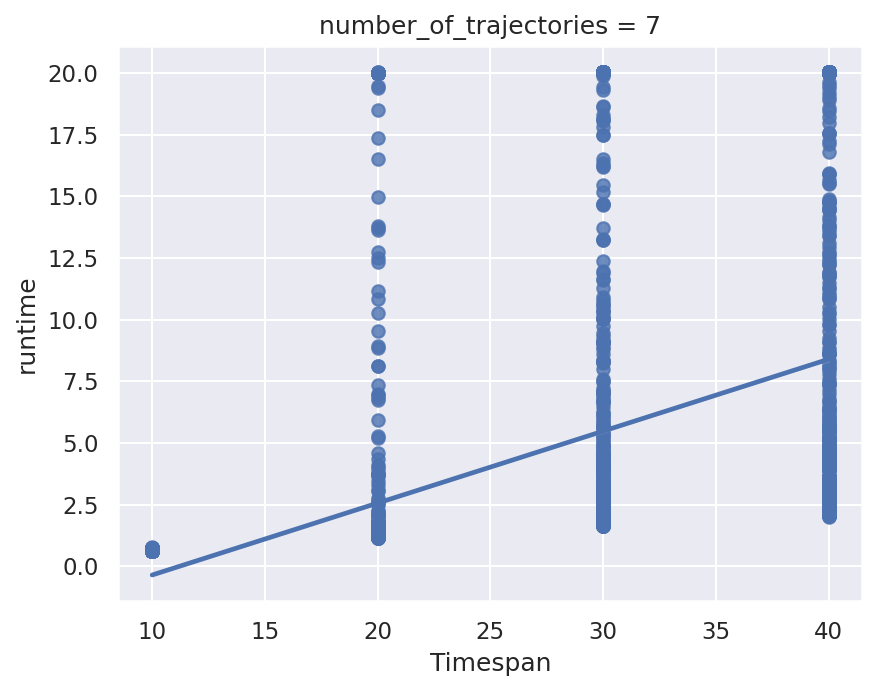

In [17]:
# for specific number of trajectories
for i in range(1,8,2):
    para_timesp = para20[para20["number_of_trajectories"] == i]
    print(f"number_of_trajectories = {i}")
    print(para_timesp.groupby(["Timespan"]).agg({"runtime":"mean"}))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(para_timesp["Timespan"], para_timesp["runtime"])
    if slope > 0:
        lab = f"runtime = {round(intercept, 2)}+{round(slope, 2)} Timespan"
    else:
        lab = f"runtime = {round(intercept, 2)}-{round(abs(slope), 2)} Timespan"
            
    print(lab)        
    fig,ax = plt.subplots(1,1)
    sns.regplot(x = para_timesp["Timespan"], y = para_timesp["runtime"], ax=ax)
    plt.title(f"number_of_trajectories = {i}")